<a href="https://colab.research.google.com/github/AdrianRamos956/Homeworks/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""
HW1 Code Skeleton
"""
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython


# Q1 Selection Sort

Although not required, it should be in-place sorting (sort the original list)

In [ ]:
from typing import MappingView
from numpy.core.multiarray import min_scalar_type

def selectionSort(numList):
  for i in range(len(numList)):
    min = i
    for j in range(i+1, len(numList)):
      if numList[min] > numList[j]:
        min = j
    numList[i], numList[min] = numList[min], numList[i]
  return numList


#%% Testing selection sort

a = [random.randint(0, 20) for _ in range(10)]
print('\n\n********* Q1 *********')
print('random array is: ', a)

b = selectionSort(a)
print('selection sorted array is: ', b)



if b == sorted(a):
    print('selectionSort is correct')

    print('profiling running time of python sorted function on a:')
    get_ipython().run_line_magic('timeit', 'sorted(a)')

    print('profiling running time of my merge sort function on a:')
    get_ipython().run_line_magic('timeit', 'selectionSort(a)')

else:
# replace the following statement with a print statement if your selection sort is incorrect
# but you want to continue with the rest of the code
    raise SystemExit('selectionSort is incorrect')





********* Q1 *********
random array is:  [3, 20, 9, 15, 11, 1, 16, 4, 11, 1]
selection sorted array is:  [1, 1, 3, 4, 9, 11, 11, 15, 16, 20]
selectionSort is correct
profiling running time of python sorted function on a:
The slowest run took 10.56 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 266 ns per loop
profiling running time of my merge sort function on a:
100000 loops, best of 5: 9.27 µs per loop


# Q2a. Merge function

In [ ]:
def merge(sortListA, sortListB):
  size_1 = len(sortListA)
  size_2 = len(sortListB)
  res = []
  i, j = 0, 0
  while i < size_1 and j < size_2:
    if sortListA[i] < sortListB[j]:
      res.append(sortListA[i])
      i += 1
    else:
      res.append(sortListB[j])
      j += 1
  res = res + sortListA[i:] + sortListB[j:]
  return res

#%% Testing merge function

a = sorted([random.randint(0, 10) for _ in range(5)]) # a is sorted
b = sorted([random.randint(0, 10) for _ in range(4)]) # b is sorted

print('\n\n********* Q2a *********')
print('a is: ', a)
print('b is: ', b)

c = merge(a, b) # c should be sorted(a+b)
print('merged result: ', c)

if (c == sorted(a + b)):
    print('merge is correct')
else:
# replace the following statement with a print statement if your merge function is incorrect
# but you want to continue with the rest of the code
    raise SystemExit('merge is incorrect')



********* Q2a *********
a is:  [0, 1, 3, 5, 8]
b is:  [3, 4, 5, 8]
merged result:  [0, 1, 3, 3, 4, 5, 5, 8, 8]
merge is correct


# Q2b merge sort

Not an in-place sorting (returns a new sorted list)

In [ ]:
def mergeSort(numList):
  if len(numList) > 1:
    mid = len(numList)//2
    L = numList[:mid]
    R = numList[mid:]
    mergeSort(L)
    mergeSort(R)
    i = j = k = 0
    while i < len(L) and j < len(R):
      if L[i] < R[j]:
        numList[k] = L[i]
        i += 1
      else:
        numList[k] = R[j]
        j += 1
      k += 1
    while i < len(L):
      numList[k] = L[i]
      i += 1
      k += 1
    while j < len(R):
      numList[k] = R[j]
      j += 1
      k += 1

    return numList


#%% Test mergeSort function


a = [random.randint(0, 20) for _ in range(10)]


print('\n\n********* Q2b *********')
print('random array is: ', a)


b = mergeSort(a)
print('merge sorted array is: ', b)


if b == sorted(a):
    print('mergeSort is correct')
    print('profiling running time of python sorted function on a:')
    get_ipython().run_line_magic('timeit', 'sorted(a)')

    print('profiling running time of my merge sort function on a:')
    get_ipython().run_line_magic('timeit', 'mergeSort(a)')

else:
# replace the following statement with a print statement if your merge sort is incorrect
# but you want to continue with the rest of the code
    raise SystemExit('mergeSort is incorrect')








********* Q2b *********
random array is:  [0, 4, 17, 15, 1, 3, 18, 7, 19, 10]
merge sorted array is:  [0, 1, 3, 4, 7, 10, 15, 17, 18, 19]
mergeSort is correct
profiling running time of python sorted function on a:
The slowest run took 9.05 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 271 ns per loop
profiling running time of my merge sort function on a:
10000 loops, best of 5: 20.3 µs per loop


# Q3 Experiment and plot

Run the three sorting algorithms on different input sizes and collect running time

In [ ]:
import time

# input size is 500 * (1, 2, 4, ..., 32)
sizes = [500 * 2**i for i in range(6)]


merge_sort_time = [0] * len(sizes)
selection_sort_time = [0] * len(sizes)
quick_sort_time = [0] * len(sizes)

print('\n\n********* Q3 *********')
print('Collecting running time (in milliseconds)')

for i in range(len(sizes)):
    print('iteration %d, size = %d' %(i, sizes[i]))
    # random array of size sizes[i]
    a = [random.random() for _ in range(sizes[i])]
    start_time = time.perf_counter()
    sorted(a)
    quick_sort_time[i] = 1000*(time.perf_counter() - start_time)
    start_time = time.perf_counter()
    mergeSort(a)
    merge_sort_time[i] = 1000*(time.perf_counter() - start_time)
    start_time = time.perf_counter()
    selectionSort(a)
    selection_sort_time[i] = 1000*(time.perf_counter() - start_time)



********* Q3 *********
iteration 0, size = 500
iteration 1, size = 1000
iteration 2, size = 2000
iteration 3, size = 4000
iteration 4, size = 8000
iteration 5, size = 16000


## Complete the following code to plot the running time; use the style show in the homework document as template, reproduce as much detail as possible.



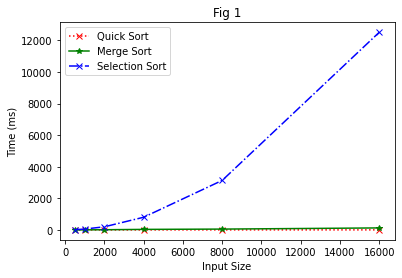

In [ ]:
plt.plot(sizes, quick_sort_time, 'r*:', marker = 'x')
plt.plot(sizes, merge_sort_time, 'gd-', marker = '*' )
plt.plot(sizes, selection_sort_time, 'bo-.', marker = 'x')
plt.title("Fig 1")
# add a label to the y-axis
plt.ylabel("Time (ms)")
# add a label to the x-axis
plt.xlabel("Input Size")
# add legend
plt.legend(['Quick Sort', 'Merge Sort', 'Selection Sort'])
plt.show()

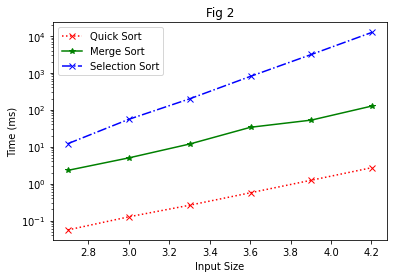

In [ ]:
plt.semilogy(np.log10(sizes), quick_sort_time, 'r*:', marker = 'x')
plt.semilogy(np.log10(sizes), merge_sort_time, 'gd-', marker = '*')
plt.semilogy(np.log10(sizes), selection_sort_time, 'bo-.', marker = 'x')


plt.title("Fig 2")
# add a label to the y-axis
plt.ylabel("Time (ms)")
# add a label to the x-axis
plt.xlabel("Input Size")
# add legend
plt.legend(['Quick Sort', 'Merge Sort', 'Selection Sort'])
plt.show()

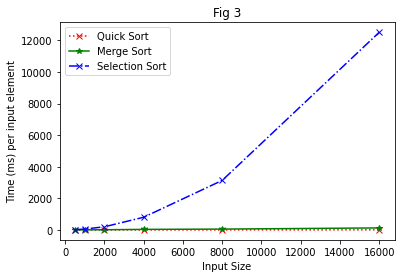

In [ ]:
plt.plot(sizes, quick_sort_time, 'r*:', marker = 'x')
plt.plot(sizes, merge_sort_time, 'gd-', marker = '*' )
plt.plot(sizes, selection_sort_time, 'bo-.', marker = 'x')
plt.title("Fig 3")
# add a label to the y-axis
plt.ylabel("Time (ms) per input element")
# add a label to the x-axis
plt.xlabel("Input Size")
# add legend
plt.legend(['Quick Sort', 'Merge Sort', 'Selection Sort'])
plt.show()

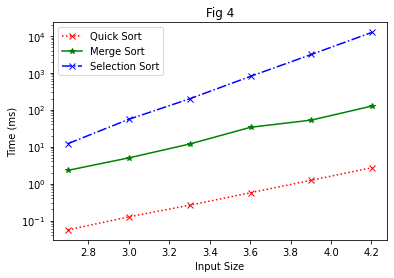

In [ ]:
plt.semilogy(np.log10(sizes), quick_sort_time, 'r*:', marker = 'x')
plt.semilogy(np.log10(sizes), merge_sort_time, 'gd-', marker = '*')
plt.semilogy(np.log10(sizes), selection_sort_time, 'bo-.', marker = 'x')


plt.title("Fig 4")
# add a label to the y-axis
plt.ylabel("Time (ms)")
# add a label to the x-axis
plt.xlabel("Input Size")
# add legend
plt.legend(['Quick Sort', 'Merge Sort', 'Selection Sort'])
plt.show()